# Otto_Group

## Importing key libraries

In [1]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_train = pd.read_csv('train.csv')

In [4]:
data_train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
data_train.shape

(61878, 95)

In [6]:
data_test = pd.read_csv('test.csv')

In [7]:
data_test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [8]:
data_test.shape

(144368, 94)

**Only target variable is missing in test dataset. **

In [9]:
data_train.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [11]:
label.fit(data_train['target'])

LabelEncoder()

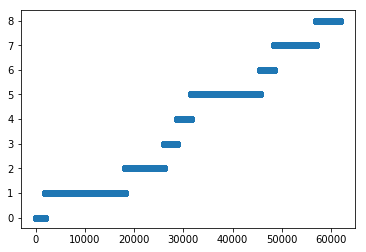

In [12]:
plt.scatter(data_train[['id']],label.transform(data_train[['target']]))

## Applying Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
X_train = data_train.copy()
X_train.drop(['id', 'target'], axis=1, inplace=True)
y_train = data_train[['target']]

In [14]:
LR = LogisticRegression(n_jobs = -1)

In [15]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
X_test = data_test.copy()
X_test.drop(['id'], axis=1, inplace=True)

In [17]:
probs = LR.predict_proba(X_test)

## Checking accuracy

In [18]:
LR.score(X_train, y_train)

0.7573450984194706

# Applying neural network 

In [20]:
columns = data_train.columns[1:-1]

In [21]:
X = data_train[columns]

In [22]:
target = data_train['target']
target.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [23]:
y = np.ravel(target)
print(y)

['Class_1' 'Class_1' 'Class_1' ... 'Class_9' 'Class_9' 'Class_9']


In [24]:
labels = np.unique(y)
labels

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

## Model

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
model = MLPClassifier(solver= 'lbfgs', hidden_layer_sizes= (30, 10), alpha= 1e-5, random_state=1)

In [27]:
model.fit(X, target)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [28]:
model.intercepts_

[array([ 1.02804256,  0.3945159 ,  0.60701075, -0.02911357,  0.96081951,
         0.07787378,  0.88540434,  0.03396277,  1.14661169,  0.36717997,
         0.66858781,  0.51020085,  0.59542263,  0.11950579,  0.18818565,
         0.43147753,  0.59542139,  0.53920137,  0.60214202,  0.24284833,
         0.93426153,  1.99161558,  1.02105912,  0.01127968,  0.00249556,
         1.28042175,  0.02312228,  0.53987151,  0.56276914,  0.55137189]),
 array([ 1.59607468,  1.04008036,  0.89468203, -0.14642073,  0.17803156,
         0.51089983,  1.21152376,  0.50321981,  0.50687954,  1.11885809]),
 array([-0.16992563,  1.04337102,  0.35643367, -1.42856955,  0.08519892,
        -0.17038976,  1.46139063,  0.84233257, -1.52133933])]

In [29]:
print(model.coefs_[0].shape)
print(model.coefs_[1].shape)
print(model.coefs_[2].shape)

(93, 30)
(30, 10)
(10, 9)


In [30]:
pred = model.predict(X)
pred

array(['Class_6', 'Class_8', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype='<U7')

In [31]:
print(model.score(X, y))

0.8021106047383562


In [32]:
print(sum(pred == y) / len(y))

0.8021106047383562


## Testing results

In [33]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [34]:
Xtest = test_data[test_data.columns[1:]]

In [35]:
Xtest.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [36]:
Xtest.shape

(144368, 93)

In [37]:
X.shape

(61878, 93)

In [38]:
test_prob = model.predict_proba(Xtest)
submission = pd.DataFrame(test_prob, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
submission['id'] = test_data['id']
cols = submission.columns.tolist()
cols = cols[-1:] + cols[:-1]
submission = submission[cols]

In [39]:
submission.to_csv('./otto_product_prediction.csv', index = False)